In [1]:
import pandas as pd
import seaborn as sns

## Explore the data

Suppose we want to predict `acceleration` given the other numerical characteristics of a car

In [2]:
df = pd.read_csv("../datasets/auto-mpg.csv")

In [3]:
df.shape

(398, 9)

In [4]:
df = df.drop("car name", axis=1)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
# Check one example to see how it prints
df.iloc[0].horsepower

'130'

Horsepower seems not to be a numeric column. What is going on?

In [8]:
for hp in df.horsepower:
    try:
        int(hp)
    except:
        print(hp)

?
?
?
?
?
?


In [9]:
# drop ? horsepowers
# Creating a dataframe with all the cars except the ones with the horsepower ?
df = df[df.horsepower != "?"]

In [10]:
df.shape

(392, 8)

In [ ]:
df.horsepower = df.horsepower.astype(float)

In [11]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## Build model with whole dataset

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
X = df.drop("acceleration", axis=1)
y = df.acceleration

In [16]:
X[:5]

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130,3504,70,1
1,15.0,8,350.0,165,3693,70,1
2,18.0,8,318.0,150,3436,70,1
3,16.0,8,304.0,150,3433,70,1
4,17.0,8,302.0,140,3449,70,1


In [17]:
y[:5]

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
Name: acceleration, dtype: float64

In [18]:
lr.fit(X=X, y=y)

LinearRegression()

In [19]:
y[:1]

0    12.0
Name: acceleration, dtype: float64

In [20]:
lr.predict(X[:1])

array([14.00670318])

In [23]:
y[:5]

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
Name: acceleration, dtype: float64

In [21]:
lr.predict(X[:5])

array([14.00670318, 11.21709765, 11.9784462 , 12.04025895, 12.98764533])

In [22]:
# r2 is the default score for LinearRegression
lr.score(X, y)

0.619822478208412

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mean_squared_error(y_true=y, y_pred=lr.predict(X))

2.8862752656774058

In [28]:
pd.DataFrame({"real": y, "pred": lr.predict(X).round(1)}).head()

,real,pred
0,12.0,14.0
1,11.5,11.2
2,11.0,12.0
3,12.0,12.0
4,10.5,13.0


<AxesSubplot:xlabel='acceleration'>

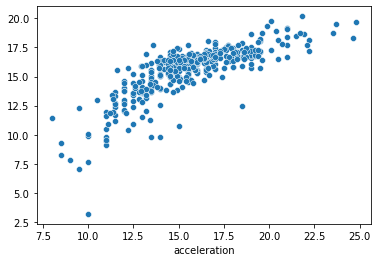

In [26]:
# x = reality
# y = prediction
sns.scatterplot(x = y, y = lr.predict(X))

## Train-test split procedure

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df.shape

(392, 8)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [32]:
X_train.shape

(313, 7)

In [33]:
X_test.shape

(79, 7)

In [34]:
lr2 = LinearRegression()

In [35]:
lr2.fit(X_train, y_train)

LinearRegression()

In [36]:
lr2.score(X_train, y_train)

0.6487240926173845

<AxesSubplot:xlabel='acceleration'>

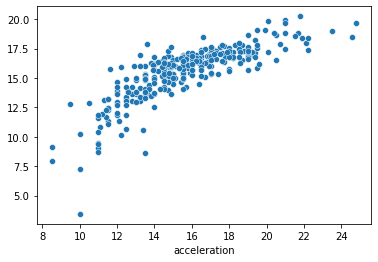

In [37]:
sns.scatterplot(x=y_train, y=lr2.predict(X_train))

In [38]:
X_test.shape

(79, 7)

In [39]:
X_test.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin
396,28.0,4,120.0,79,2625,82,1
117,29.0,4,68.0,49,1867,73,2
191,22.0,6,225.0,100,3233,76,1
371,29.0,4,135.0,84,2525,82,1
274,20.3,5,131.0,103,2830,78,2


In [45]:
lr2.predict(X_test).round(1)

array([17.2, 18.3, 16.5, 16.4, 15.3, 15.2, 14.3, 18.1, 14.1, 17. , 17.6,
       13.5, 12.5, 15. , 16.6, 14.1, 16.8, 18.5, 14.7, 16.9, 15.9, 17.1,
       16.6, 18.2, 16.4, 17.6, 17.3,  9.6, 16.4, 15.8, 13.2, 12. , 11.2,
       14.6,  8.8, 15.5, 15.7, 17.5, 16.5, 17. , 13.7, 16.6, 15.8, 15.4,
       15.6, 16.9, 16.4, 16.8, 17.1, 11.3, 16.5, 15. , 14. , 19.5, 16.8,
       16.7, 17.6,  9.7, 17.4, 14.7,  6.2, 17.5, 16. , 14.4, 16.7,  7.6,
       16.6, 17.3, 15.8, 17.1, 11.4, 16.6, 13.4, 17. , 16.9, 16.5, 17.4,
       15.4, 16.9])

In [43]:
y_test[:5]

396    18.6
117    19.5
191    15.4
371    16.0
274    15.9
Name: acceleration, dtype: float64

In [46]:
lr2.score(X_test, y_test)

0.43439098354133543

This is the expected error we will have when testing on OTHER UNSEEN cars

<AxesSubplot:xlabel='acceleration'>

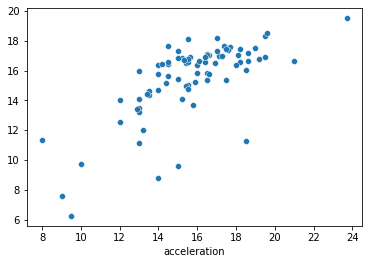

In [47]:
sns.scatterplot(x=y_test, y=lr2.predict(X_test))

Extra: Cross validation to consider different train-test-split

Find out how to do it